In [ ]:
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pyspark.sql.functions import col

In [ ]:
spark = SparkSession.builder.appName("Offence_Database").getOrCreate()

# Importing The Worksheets

In [ ]:
df_2013_14 = spark.read.csv("C:/Users/Emeka/Downloads/2013-14.csv", header=True, inferSchema=True)

In [ ]:
df_2014_15 = spark.read.csv("C:/Users/Emeka/Downloads/2014-15.csv", header=True, inferSchema=True)

In [ ]:
df_2015_16 = spark.read.csv("C:/Users/Emeka/Downloads/2015-16.csv", header=True, inferSchema=True)

In [ ]:
df_2016_17 = spark.read.csv("C:/Users/Emeka/Downloads/2016-17.csv", header=True, inferSchema=True)

In [ ]:
df_2017_18 = spark.read.csv("C:/Users/Emeka/Downloads/2017-18.csv", header=True, inferSchema=True)

In [ ]:
df_2013_14.show(3)
print(df_2013_14.count(), "rows")
print (len(df_2013_14.columns), "columns")

+--------------+-----------------+-----------------+--------------------+--------------------+--------------------+------------+------------------+
|Financial Year|Financial Quarter|       Force Name| Offence Description|       Offence Group|    Offence Subgroup|Offence Code|Number of Offences|
+--------------+-----------------+-----------------+--------------------+--------------------+--------------------+------------+------------------+
|       2013/14|                1|Avon and Somerset|Absconding from l...|Miscellaneous cri...|Miscellaneous cri...|          80|                 4|
|       2013/14|                1|Avon and Somerset|Abuse of children...|     Sexual offences|Other sexual offe...|          71|                 0|
|       2013/14|                1|Avon and Somerset|Abuse of position...|     Sexual offences|Other sexual offe...|          73|                 8|
+--------------+-----------------+-----------------+--------------------+--------------------+------------------

In [ ]:
df_2014_15.show(3)
print(df_2014_15.count(),"rows")
print (len(df_2014_15.columns),"columns")

+--------------+-----------------+-----------------+--------------------+--------------------+--------------------+------------+------------------+
|Financial Year|Financial Quarter|       Force Name| Offence Description|       Offence Group|    Offence Subgroup|Offence Code|Number of Offences|
+--------------+-----------------+-----------------+--------------------+--------------------+--------------------+------------+------------------+
|       2014/15|                1|Avon and Somerset|Absconding from l...|Miscellaneous cri...|Miscellaneous cri...|          80|                 3|
|       2014/15|                1|Avon and Somerset|Abuse of children...|     Sexual offences|Other sexual offe...|          71|                 3|
|       2014/15|                1|Avon and Somerset|Abuse of position...|     Sexual offences|Other sexual offe...|          73|                 3|
+--------------+-----------------+-----------------+--------------------+--------------------+------------------

In [ ]:
df_2015_16.show(3)
print(df_2015_16.count(),"rows")
print (len(df_2015_16.columns),"columns")

+--------------+-----------------+-----------------+--------------------+--------------------+--------------------+------------+------------------+
|Financial Year|Financial Quarter|       Force Name| Offence Description|       Offence Group|    Offence Subgroup|Offence Code|Number of Offences|
+--------------+-----------------+-----------------+--------------------+--------------------+--------------------+------------+------------------+
|       2015/16|                1|Avon and Somerset|Absconding from l...|Miscellaneous cri...|Miscellaneous cri...|          80|                 3|
|       2015/16|                1|Avon and Somerset|Abuse of children...|     Sexual offences|Other sexual offe...|          71|                 3|
|       2015/16|                1|Avon and Somerset|Abuse of position...|     Sexual offences|Other sexual offe...|          73|                 5|
+--------------+-----------------+-----------------+--------------------+--------------------+------------------

In [ ]:
df_2016_17.show(3)
print(df_2016_17.count(),"rows")
print (len(df_2016_17.columns),"columns")

+--------------+-----------------+-----------------+--------------------+--------------------+--------------------+------------+------------------+
|Financial Year|Financial Quarter|       Force Name| Offence Description|       Offence Group|    Offence Subgroup|Offence Code|Number of Offences|
+--------------+-----------------+-----------------+--------------------+--------------------+--------------------+------------+------------------+
|       2016/17|                1|Avon and Somerset|Absconding from l...|Miscellaneous cri...|Miscellaneous cri...|          80|                 7|
|       2016/17|                1|Avon and Somerset|Abuse of children...|     Sexual offences|Other sexual offe...|          71|                 5|
|       2016/17|                1|Avon and Somerset|Abuse of position...|     Sexual offences|Other sexual offe...|          73|                 4|
+--------------+-----------------+-----------------+--------------------+--------------------+------------------

In [ ]:
df_2017_18.show(3)
print(df_2017_18.count(),"rows")
print (len(df_2017_18.columns),"columns")

+--------------+-----------------+-----------------+--------------------+--------------------+--------------------+------------+------------------+
|Financial Year|Financial Quarter|       Force Name| Offence Description|       Offence Group|    Offence Subgroup|Offence Code|Number of Offences|
+--------------+-----------------+-----------------+--------------------+--------------------+--------------------+------------+------------------+
|       2017/18|                1|Avon and Somerset|Absconding from l...|Miscellaneous cri...|Miscellaneous cri...|          80|                 2|
|       2017/18|                1|Avon and Somerset|Abuse of children...|     Sexual offences|Other sexual offe...|          71|                 6|
|       2017/18|                1|Avon and Somerset|Abuse of position...|     Sexual offences|Other sexual offe...|          73|                 1|
+--------------+-----------------+-----------------+--------------------+--------------------+------------------

# Analysing Each Schema Before Merging

In [ ]:
df_2013_14.printSchema()

root
 |-- Financial Year: string (nullable = true)
 |-- Financial Quarter: integer (nullable = true)
 |-- Force Name: string (nullable = true)
 |-- Offence Description: string (nullable = true)
 |-- Offence Group: string (nullable = true)
 |-- Offence Subgroup: string (nullable = true)
 |-- Offence Code: string (nullable = true)
 |-- Number of Offences: integer (nullable = true)



In [ ]:
df_2014_15.printSchema()

root
 |-- Financial Year: string (nullable = true)
 |-- Financial Quarter: integer (nullable = true)
 |-- Force Name: string (nullable = true)
 |-- Offence Description: string (nullable = true)
 |-- Offence Group: string (nullable = true)
 |-- Offence Subgroup: string (nullable = true)
 |-- Offence Code: string (nullable = true)
 |-- Number of Offences: integer (nullable = true)



In [ ]:
df_2015_16.printSchema()

root
 |-- Financial Year: string (nullable = true)
 |-- Financial Quarter: integer (nullable = true)
 |-- Force Name: string (nullable = true)
 |-- Offence Description: string (nullable = true)
 |-- Offence Group: string (nullable = true)
 |-- Offence Subgroup: string (nullable = true)
 |-- Offence Code: string (nullable = true)
 |-- Number of Offences: integer (nullable = true)



In [ ]:
df_2016_17.printSchema()

root
 |-- Financial Year: string (nullable = true)
 |-- Financial Quarter: integer (nullable = true)
 |-- Force Name: string (nullable = true)
 |-- Offence Description: string (nullable = true)
 |-- Offence Group: string (nullable = true)
 |-- Offence Subgroup: string (nullable = true)
 |-- Offence Code: string (nullable = true)
 |-- Number of Offences: integer (nullable = true)



In [ ]:
df_2017_18.printSchema()

root
 |-- Financial Year: string (nullable = true)
 |-- Financial Quarter: integer (nullable = true)
 |-- Force Name: string (nullable = true)
 |-- Offence Description: string (nullable = true)
 |-- Offence Group: string (nullable = true)
 |-- Offence Subgroup: string (nullable = true)
 |-- Offence Code: string (nullable = true)
 |-- Number of Offences: integer (nullable = true)



# Merging The Datasets using SQL for Pyspark

In [ ]:
df_final = df_2013_14.union(df_2014_15).union(df_2015_16).union(df_2016_17).union(df_2017_18)

In [ ]:
df_final.show(5)
print(df_final.count(),"rows")
print (len(df_final.columns),"columns")

+--------------+-----------------+-----------------+--------------------+--------------------+--------------------+------------+------------------+
|Financial Year|Financial Quarter|       Force Name| Offence Description|       Offence Group|    Offence Subgroup|Offence Code|Number of Offences|
+--------------+-----------------+-----------------+--------------------+--------------------+--------------------+------------+------------------+
|       2013/14|                1|Avon and Somerset|Absconding from l...|Miscellaneous cri...|Miscellaneous cri...|          80|                 4|
|       2013/14|                1|Avon and Somerset|Abuse of children...|     Sexual offences|Other sexual offe...|          71|                 0|
|       2013/14|                1|Avon and Somerset|Abuse of position...|     Sexual offences|Other sexual offe...|          73|                 8|
|       2013/14|                1|Avon and Somerset|Aggravated burgla...|      Theft offences|Non-domestic burg.

# Exploratory Data Analysis (EDA) using Python

In [ ]:
# Convert the pyspark dataframe to pandas to perform EDA

df_final = df_final.toPandas()

In [ ]:
#Displays the first 5 records

df_final.head()

,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Number of Offences
0,2013/14,1,Avon and Somerset,Absconding from lawful custody,Miscellaneous crimes against society,Miscellaneous crimes against society,80,4
1,2013/14,1,Avon and Somerset,Abuse of children through sexual exploitation,Sexual offences,Other sexual offences,71,0
2,2013/14,1,Avon and Somerset,Abuse of position of trust of a sexual nature,Sexual offences,Other sexual offences,73,8
3,2013/14,1,Avon and Somerset,Aggravated burglary in a building other than a...,Theft offences,Non-domestic burglary,31,2
4,2013/14,1,Avon and Somerset,Aggravated burglary in a dwelling (outcome only),Theft offences,Domestic burglary,29,8


In [ ]:
#Displays the bottom 5 records

df_final.tail()

,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Number of Offences
107591,2017/18,3,CIFAS,Fraud offences recorded by CIFAS,Fraud offences,Fraud: CIFAS,CIFAS,63381
107592,2017/18,3,UK Finance,Fraud offences recorded by UK Finance,Fraud offences,Fraud: UK Finance,UK Finance,17188
107593,2017/18,4,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: action fraud,AF,72815
107594,2017/18,4,CIFAS,Fraud offences recorded by CIFAS,Fraud offences,Fraud: CIFAS,CIFAS,66760
107595,2017/18,4,UK Finance,Fraud offences recorded by UK Finance,Fraud offences,Fraud: UK Finance,UK Finance,21116


In [ ]:
#Count of non-null values in each column

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107596 entries, 0 to 107595
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Financial Year       107596 non-null  object
 1   Financial Quarter    107596 non-null  int32 
 2   Force Name           107596 non-null  object
 3   Offence Description  107596 non-null  object
 4   Offence Group        107596 non-null  object
 5   Offence Subgroup     107596 non-null  object
 6   Offence Code         107596 non-null  object
 7   Number of Offences   107596 non-null  int32 
dtypes: int32(2), object(6)
memory usage: 5.7+ MB


In [ ]:
# Checking null values in each column

df_final.isnull()

,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Number of Offences
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
107591,False,False,False,False,False,False,False,False
107592,False,False,False,False,False,False,False,False
107593,False,False,False,False,False,False,False,False
107594,False,False,False,False,False,False,False,False


In [ ]:
#Check for missing values

df_final.isnull().sum()

#There are no missing values

Financial Year         0
Financial Quarter      0
Force Name             0
Offence Description    0
Offence Group          0
Offence Subgroup       0
Offence Code           0
Number of Offences     0
dtype: int64

In [ ]:
#Are ther any null values?

df_final.isnull().any().any()

False

In [ ]:
# To check number of unique values in each column

df_final.nunique()

Financial Year            5
Financial Quarter         4
Force Name               49
Offence Description     135
Offence Group            10
Offence Subgroup         30
Offence Code            135
Number of Offences     3464
dtype: int64

In [ ]:
# Displays a sample set at random

df_final.sample(5)

,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Number of Offences
106981,2017/18,4,Warwickshire,Exposure and voyeurism,Sexual offences,Other sexual offences,88E,24
85281,2017/18,1,Cleveland,Rape of a female child under 13,Sexual offences,Rape offences,19E,17
26516,2014/15,2,Cambridgeshire,Sexual activity involving child under 16,Sexual offences,Other sexual offences,22B,22
74994,2016/17,3,Dorset,Dangerous driving,Miscellaneous crimes against society,Miscellaneous crimes against society,802,7
92870,2017/18,2,Kent,Procuring illegal abortion,Violence against the person,Violence without injury,14,0


In [ ]:
# Displays all the different force

df_final['Force Name'].unique()

array(['Avon and Somerset', 'Bedfordshire', 'British Transport Police',
       'Cambridgeshire', 'Cheshire', 'Cleveland', 'Cumbria', 'Derbyshire',
       'Devon and Cornwall', 'Dorset', 'Durham', 'Dyfed-Powys', 'Essex',
       'Gloucestershire', 'Greater Manchester', 'Gwent', 'Hampshire',
       'Hertfordshire', 'Humberside', 'Kent', 'Lancashire',
       'Leicestershire', 'Lincolnshire', 'London, City of', 'Merseyside',
       'Metropolitan Police', 'Norfolk', 'North Wales', 'North Yorkshire',
       'Northamptonshire', 'Northumbria', 'Nottinghamshire',
       'South Wales', 'South Yorkshire', 'Staffordshire', 'Suffolk',
       'Surrey', 'Sussex', 'Thames Valley', 'Warwickshire', 'West Mercia',
       'West Midlands', 'West Yorkshire', 'Wiltshire', 'Action Fraud',
       'Cifas', 'Financial Fraud Action UK', 'CIFAS', 'UK Finance'],
      dtype=object)

In [ ]:
# Displays each unique Offence Description

df_final['Offence Description'].unique()

array(['Absconding from lawful custody',
       'Abuse of children through sexual exploitation',
       'Abuse of position of trust of a sexual nature',
       'Aggravated burglary in a building other than a dwelling(outcome only)',
       'Aggravated burglary in a dwelling (outcome only)',
       'Aggravated vehicle taking', 'Aiding suicide',
       'Arson endangering life', 'Arson not endangering life',
       'Assault with injury', 'Assault with intent to cause serious harm',
       'Assault without injury', 'Assault without injury on a constable',
       'Attempted burglary in a building other than a dwelling (outcome only)',
       'Attempted burglary in a dwelling (outcome only)',
       'Attempted distraction burglary in a dwelling (outcome only)',
       'Attempted murder', 'Bail offences', 'Bigamy', 'Blackmail',
       'Burglary in a building other than a dwelling (outcome only)',
       'Burglary in a dwelling(outcome only)',
       'Causing death by aggravated vehicle taking

In [ ]:
# Displays the diffrent Offence Groups

df_final['Offence Group'].unique()

array(['Miscellaneous crimes against society', 'Sexual offences',
       'Theft offences', 'Criminal damage and arson',
       'Violence against the person', 'Drug offences',
       'Possession of weapons offences', 'Public order offences',
       'Robbery', 'Fraud offences'], dtype=object)

In [ ]:
# Displays the unique Subgroups

df_final['Offence Subgroup'].unique()

array(['Miscellaneous crimes against society', 'Other sexual offences',
       'Non-domestic burglary', 'Domestic burglary',
       'Theft of a motor vehicle', 'Arson', 'Violence with injury',
       'Violence without injury', 'Other theft offences',
       'Death or serious injury - unlawful driving', 'Homicide',
       'Criminal damage', 'Stalking and harassment',
       'Vehicle interference', 'Possession of drugs',
       'Possession of weapons offences', 'Public order offences',
       'Rape offences', 'Robbery of business property',
       'Robbery of personal property', 'Shoplifting',
       'Theft from the person', 'Theft from a vehicle', 'Bicycle theft',
       'Trafficking of drugs', 'Fraud: Action Fraud', 'Fraud: CIFAS',
       'Fraud: Financial Fraud Action UK', 'Fraud: action fraud',
       'Fraud: UK Finance'], dtype=object)

In [ ]:
# Displays a brief description of the number of unique values, null values and data type

Desc = {'unique_values' : df_final.nunique(),
        'na_values' : df_final.isna().sum(),
        'data_type' : df_final.dtypes}

pd.DataFrame(Desc)

,unique_values,na_values,data_type
Financial Year,5,0,object
Financial Quarter,4,0,int32
Force Name,49,0,object
Offence Description,135,0,object
Offence Group,10,0,object
Offence Subgroup,30,0,object
Offence Code,135,0,object
Number of Offences,3464,0,int32


In [ ]:
# Calculate IQR
q1 = df_final['Number of Offences'].quantile(0.25)
q3 = df_final['Number of Offences'].quantile(0.75)
iqr = q3 - q1

In [ ]:
# Identify outliers using IQR
outliers_iqr = df_final[(df_final['Number of Offences'] < q1 - 1.5 * iqr) | (df_final['Number of Offences'] > q3 + 1.5 * iqr)]

In [ ]:
outliers_iqr

,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Number of Offences
9,2013/14,1,Avon and Somerset,Assault with injury,Violence against the person,Violence with injury,8N,1902
11,2013/14,1,Avon and Somerset,Assault without injury,Violence against the person,Violence without injury,105A,1487
20,2013/14,1,Avon and Somerset,Burglary in a building other than a dwelling (...,Theft offences,Non-domestic burglary,30A,1347
21,2013/14,1,Avon and Somerset,Burglary in a dwelling(outcome only),Theft offences,Domestic burglary,28A,757
33,2013/14,1,Avon and Somerset,Criminal damage to a building other than a dwe...,Criminal damage and arson,Criminal damage,58B,455
...,...,...,...,...,...,...,...,...
107591,2017/18,3,CIFAS,Fraud offences recorded by CIFAS,Fraud offences,Fraud: CIFAS,CIFAS,63381
107592,2017/18,3,UK Finance,Fraud offences recorded by UK Finance,Fraud offences,Fraud: UK Finance,UK Finance,17188
107593,2017/18,4,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: action fraud,AF,72815
107594,2017/18,4,CIFAS,Fraud offences recorded by CIFAS,Fraud offences,Fraud: CIFAS,CIFAS,66760


In [ ]:
# Winsorize extreme values
df_final['Number of Offences'] = np.where(df_final['Number of Offences'] > outliers_iqr['Number of Offences'].max(),
                                    outliers_iqr['Number of Offences'].max(), df_final['Number of Offences'])
df_final['Number of Offences'] = np.where(df_final['Number of Offences'] < outliers_iqr['Number of Offences'].min(),
                                    outliers_iqr['Number of Offences'].min(), df_final['Number of Offences'])

# Visualizaton with Python

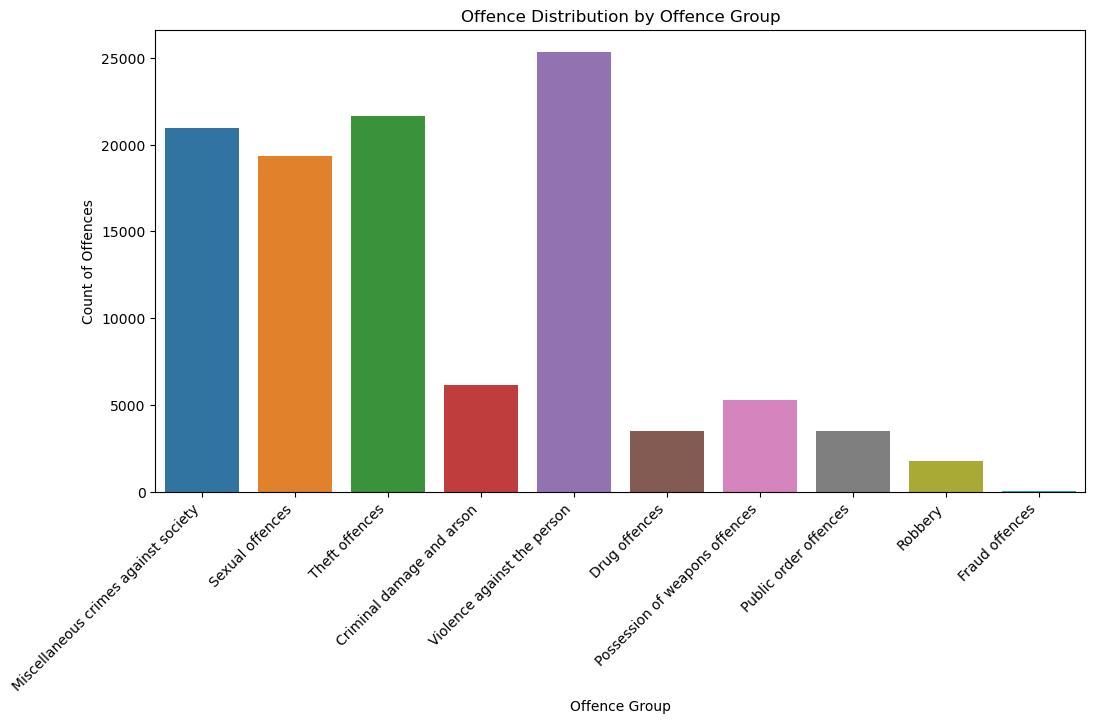

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Offence Group', data=df_final)
plt.title('Offence Distribution by Offence Group')
plt.xlabel('Offence Group')
plt.ylabel('Count of Offences')
plt.xticks(rotation=45, ha='right')
plt.show()

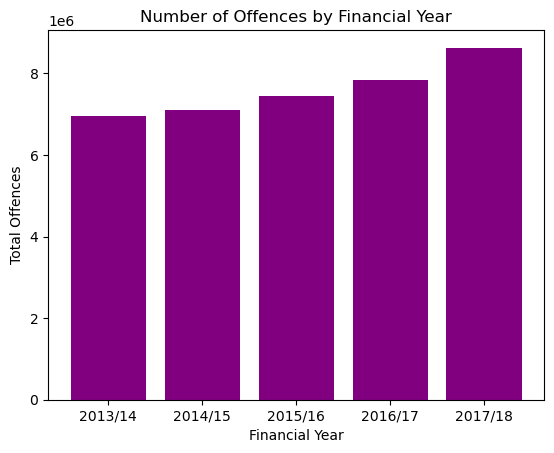

In [ ]:
grouped_data = df_final.groupby("Financial Year")["Number of Offences"].sum()

plt.bar(grouped_data.index, grouped_data.values, color = 'purple')
plt.xlabel("Financial Year")
plt.ylabel("Total Offences")
plt.title("Number of Offences by Financial Year")
plt.show()

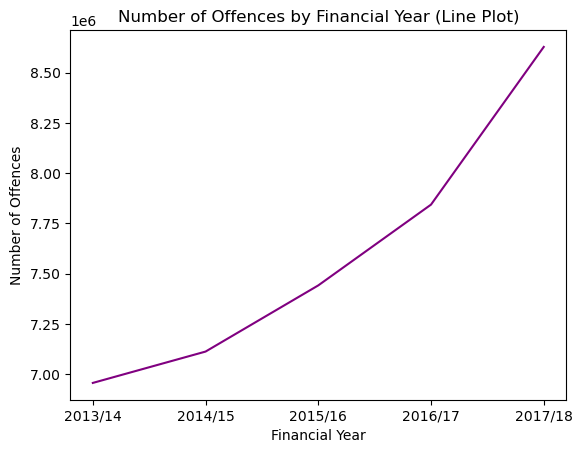

In [ ]:
plt.plot(grouped_data.index, grouped_data.values, color = 'purple')
plt.xlabel("Financial Year")
plt.ylabel("Number of Offences")
plt.title("Number of Offences by Financial Year (Line Plot)")
plt.show()

C:\Users\Emeka\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


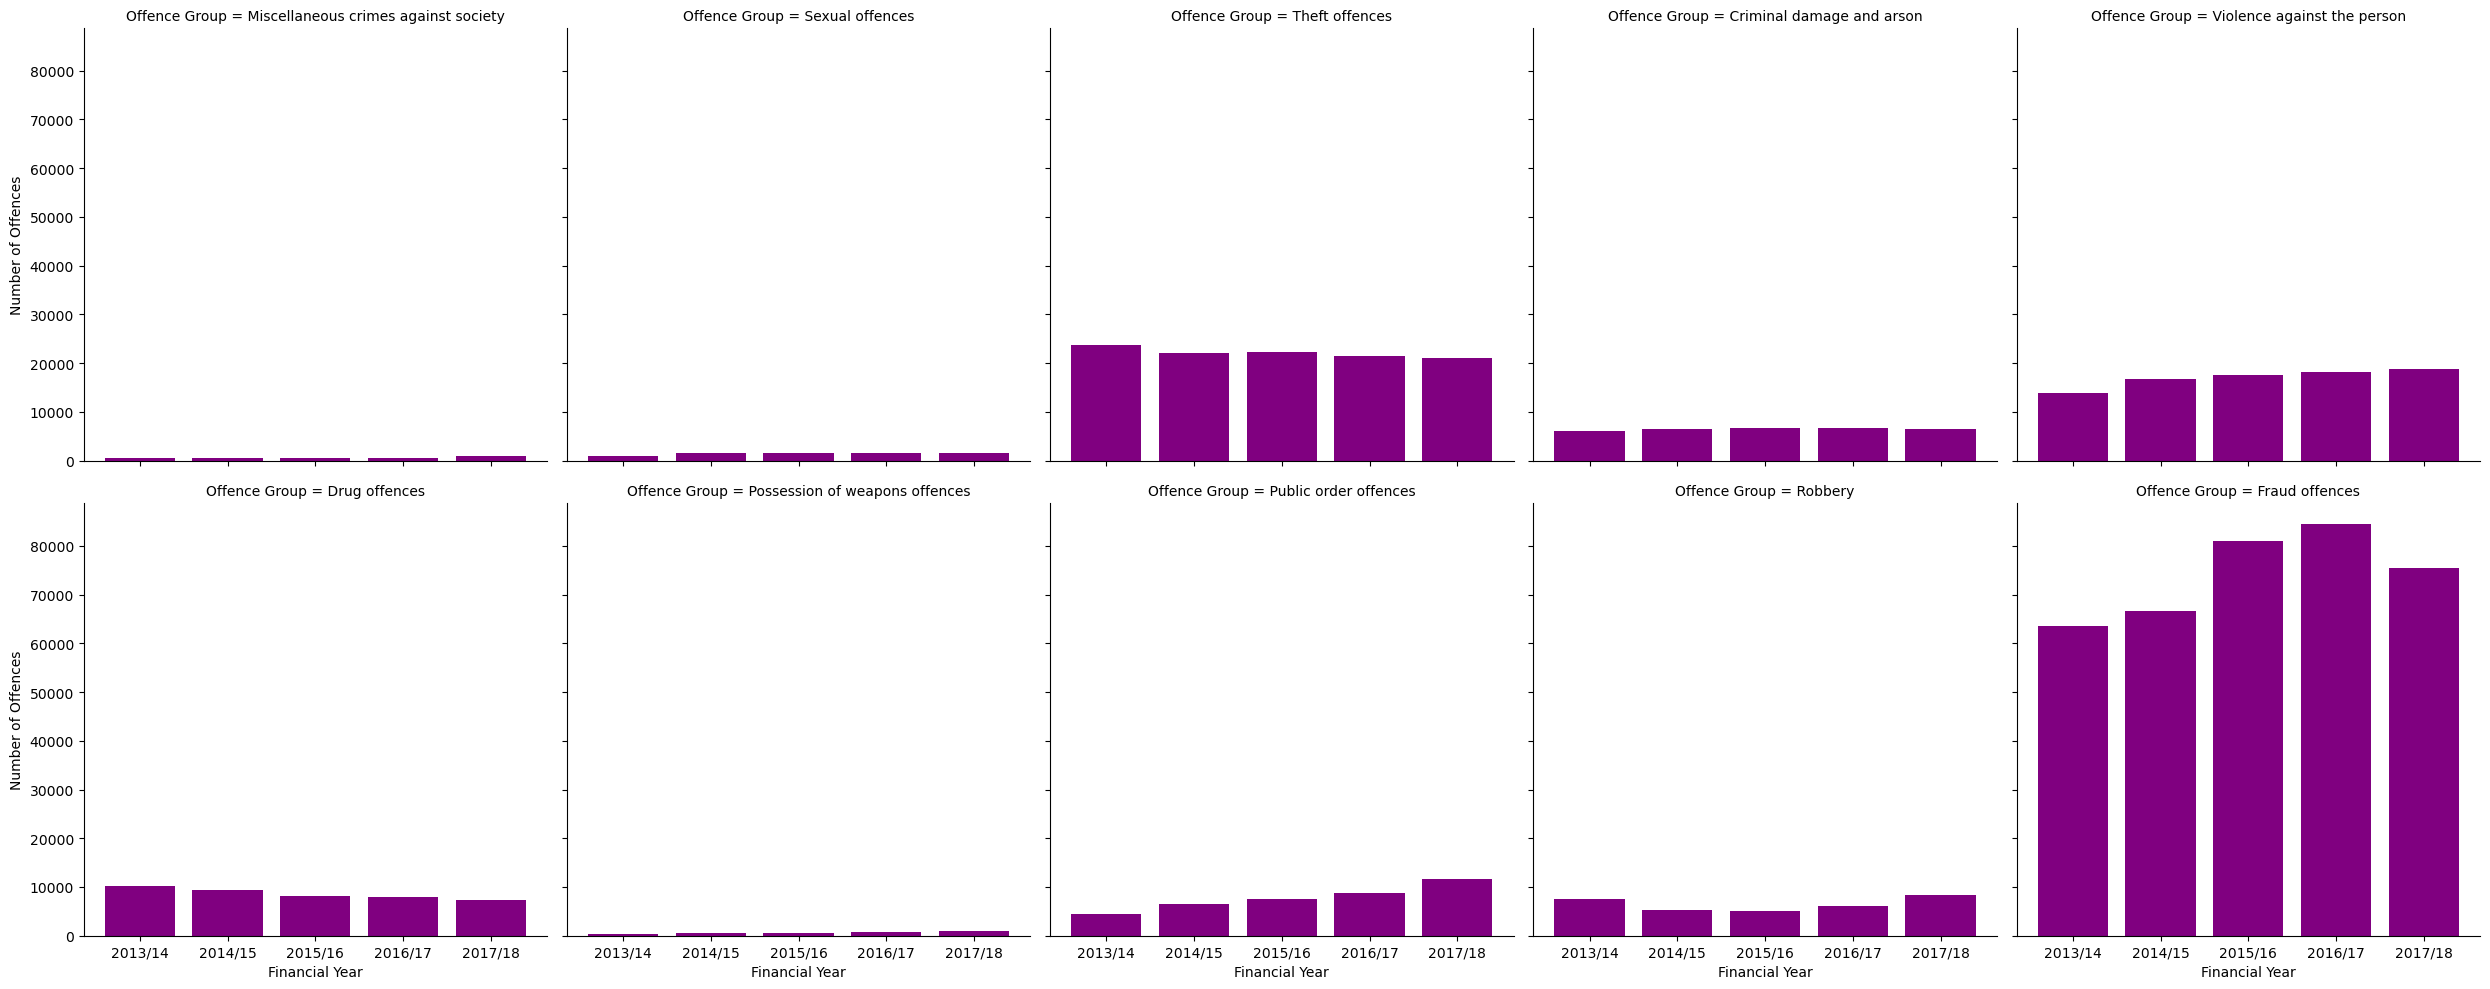

In [ ]:
g = sns.FacetGrid(df_final, col = "Offence Group", height=5,col_wrap=5)
g.map(plt.bar, "Financial Year",'Number of Offences', color = 'purple')

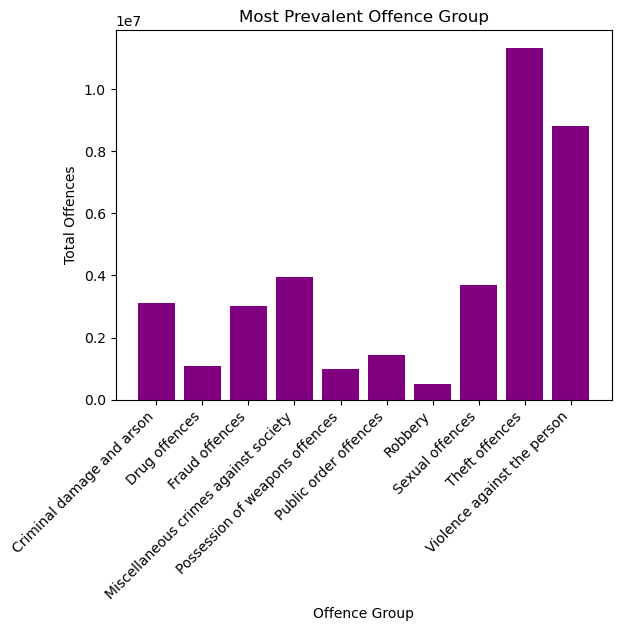

In [ ]:
grouped_df = df_final.groupby("Offence Group")["Number of Offences"].sum()
most_prevalent_group = grouped_df.sort_values(ascending=False)
most_prevalent_group.index[0]

plt.bar(grouped_df.index, grouped_df.values, color = "purple")
plt.xlabel("Offence Group")
plt.ylabel("Total Offences")
plt.title("Most Prevalent Offence Group")
plt.xticks(rotation=45, ha='right')
plt.show()

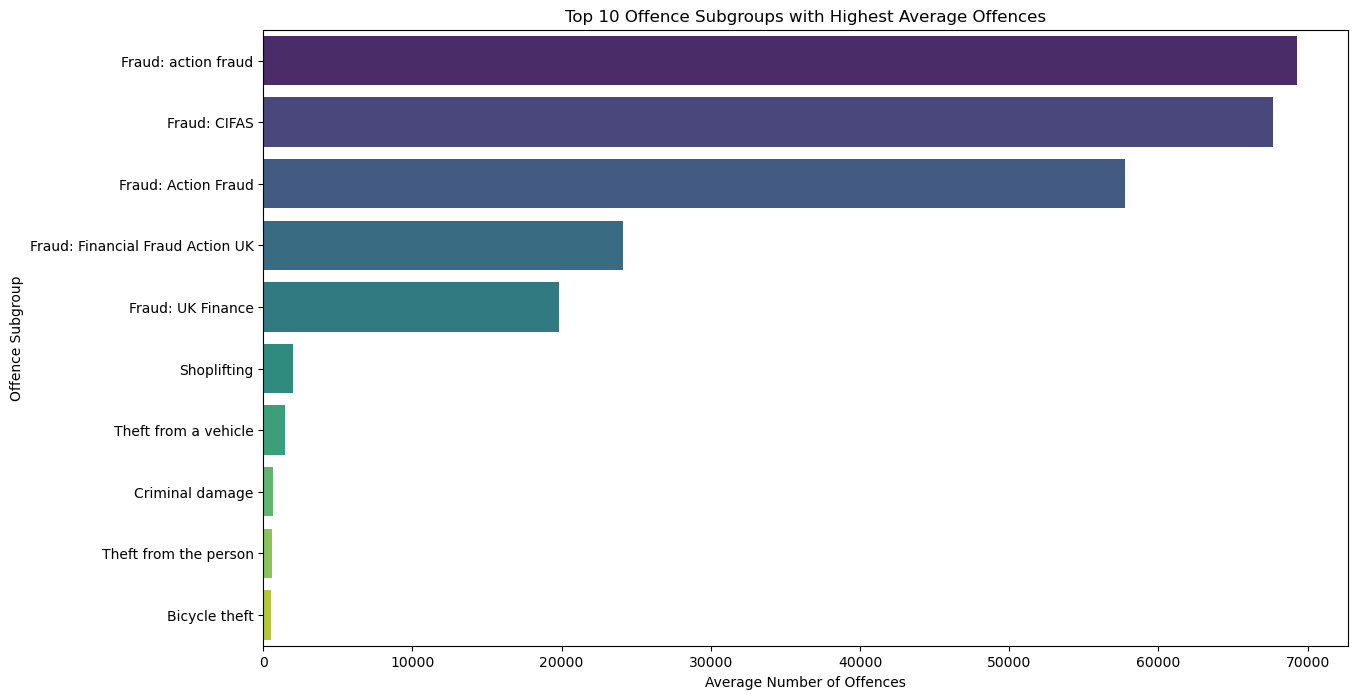

In [ ]:
top_offence_subgroups = df_final.groupby('Offence Subgroup')['Number of Offences'].mean().nlargest(10)
plt.figure(figsize=(14, 8))
sns.barplot(x=top_offence_subgroups.values, y=top_offence_subgroups.index, palette='viridis')
plt.title('Top 10 Offence Subgroups with Highest Average Offences')
plt.xlabel('Average Number of Offences')
plt.ylabel('Offence Subgroup')
plt.show()

# Machine Learning Predicting Number of Offences

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Converting categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
df_final['Financial Year'] = label_encoder.fit_transform(df_final['Financial Year'])
df_final['Force Name'] = label_encoder.fit_transform(df_final['Force Name'])
df_final['Offence Description'] = label_encoder.fit_transform(df_final['Offence Description'])
df_final['Offence Group'] = label_encoder.fit_transform(df_final['Offence Group'])
df_final['Offence Subgroup'] = label_encoder.fit_transform(df_final['Offence Subgroup'])
df_final['Offence Code'] = label_encoder.fit_transform(df_final['Offence Code'])

In [ ]:
# Choosing our features and target variable
X = df_final[['Financial Year', 'Force Name', 'Offence Description', 'Offence Group', 'Offence Subgroup', 'Offence Code']]
y = df_final['Number of Offences']

In [ ]:
# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# test sixe of 0.2 =  80/20 (80% train, 20% test)


In [ ]:
X_train

,Financial Year,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code
41207,1,42,35,9,28,66
25815,1,46,130,7,13,100
102080,4,2,133,5,17,94
74865,3,11,37,9,29,11
52901,2,3,113,7,13,24
...,...,...,...,...,...,...
54886,2,23,35,9,28,66
76820,3,28,61,9,22,114
103694,4,18,40,9,10,60
860,0,10,42,0,2,83


In [ ]:
X_train.shape

(86076, 6)

In [ ]:
X_test.shape

(21520, 6)

# Linear Regression Model

In [ ]:
# Creating the Linear Regression Model
LR = LinearRegression()

In [ ]:
# Fit the model to the training data
LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make Prediction based on the model

y_predict = LR.predict(X_test)

In [ ]:
y_predict


array([297.43936005, 187.45484178, 437.93066219, ..., 385.0435396 ,
       244.64402558, 366.72225238])

In [ ]:
# Checking accuracy of the model

LR.score(X_test, y_test)

0.004828158318755049

In [ ]:
# Using Evaluation metrics to test model

from sklearn import metrics

In [ ]:
# Mean Squared Error

MSE = print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_predict))

Mean Squared Error:  1881624.630196311


In [ ]:
# Mean Absolute Error

MAE = print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_predict))

Mean Absolute Error:  283.85855524222006


In [ ]:
#Root Mean Squared Error

RMSE = print('Root Mean Sq Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Root Mean Sq Error: 1371.7232338180727


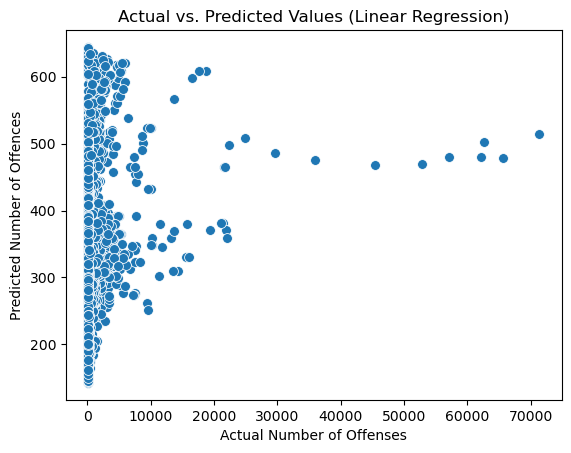

In [ ]:
# Visualizing actual vs Predicted values

sns.scatterplot(x=y_test, y=y_predict, s = 50)
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.xlabel('Actual Number of Offenses')
plt.ylabel('Predicted Number of Offences')
plt.show()

# Support Vector Regression (Linear)

In [ ]:
from sklearn.svm import SVR

In [ ]:
Linear = SVR(kernel = 'linear')
Linear.fit(X_train, y_train)


In [ ]:
y_predict = Linear.predict(X_test)

In [ ]:
y_predict

In [ ]:
# Mean Squared error
LMSE = print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_predict))

# Mean Absolute Error
LMAE = print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_predict))

# Root Mean Squared Error
L_RMSE = print('Root Mean Sq Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

In [ ]:
sns.scatterplot(x=y_test, y=y_predict)
plt.title('Actual vs. Predicted Values (Linear SVR)')
plt.xlabel('Actual Number of Offenses')
plt.ylabel('Predicted Number of Offences')
plt.show()

# Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
DTR = DecisionTreeRegressor()
DTR.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_predict = DTR.predict(X_test)

In [ ]:
y_predict

array([187. , 187. , 187. , ..., 187. , 204.5, 187. ])

In [ ]:
DTR.score(X_test, y_test)

0.9854989278857784

In [ ]:
D_MSE = print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_predict))

D_MAE = print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_predict))

D_RMSE = print('Root Mean Sq Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Squared Error:  27417.952670642295
Mean Absolute Error:  18.151130731102853
Root Mean Sq Error: 165.58367271757893


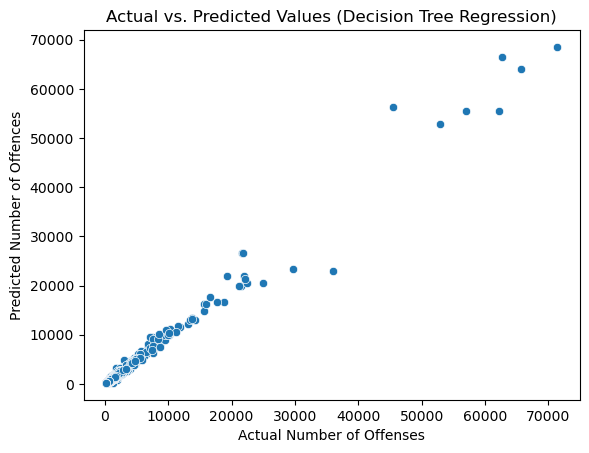

In [ ]:
sns.scatterplot(x=y_test, y=y_predict)
plt.title('Actual vs. Predicted Values (Decision Tree Regression)')
plt.xlabel('Actual Number of Offenses')
plt.ylabel('Predicted Number of Offences')
plt.show()

# Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF100 = RandomForestRegressor(n_estimators = 100)   #For 100 estimators
RF100.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_predict = RF100.predict(X_test)

In [ ]:
y_predict

array([187.        , 187.        , 187.        , ..., 187.        ,
       211.18845238, 187.        ])

In [ ]:
# Checking accuracy of the model

RF100.score(X_test, y_test)

0.9857481976611228

In [ ]:
RF100_MSE = print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_predict))

RF100_MAE = print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_predict))

RF100_RMSE = print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Squared Error:  26946.644973612685
Mean Absolute Error:  18.391084225584414
Root Mean Squared Error:  164.15433278964247


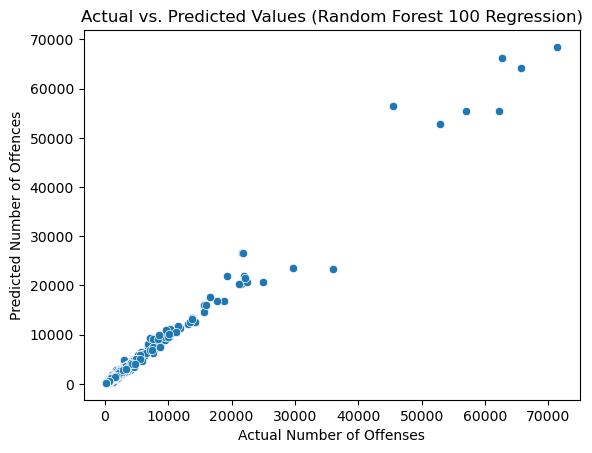

In [ ]:
# Visualizing the prediction

sns.scatterplot(x=y_test, y=y_predict )
plt.title('Actual vs. Predicted Values (Random Forest 100 Regression)')
plt.xlabel('Actual Number of Offenses')
plt.ylabel('Predicted Number of Offences')
plt.show()

In [ ]:
RF_200 = RandomForestRegressor(n_estimators = 200)   #For 200 estimators
RF_200.fit(X_train, y_train)
y_predict = RF_200.predict(X_test)

In [ ]:
y_predict

array([187.        , 187.        , 187.        , ..., 187.        ,
       213.84004167, 187.        ])

In [ ]:
# Checking accuracy of the model

RF_200.score(X_test, y_test)

0.9853929732810629

In [ ]:
RF200_MSE = print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_predict))

RF200_MAE = print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_predict))

RF200_RMSE = print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Squared Error:  27618.286709011587
Mean Absolute Error:  18.396539581511917
Root Mean Squared Error:  166.18750467171589


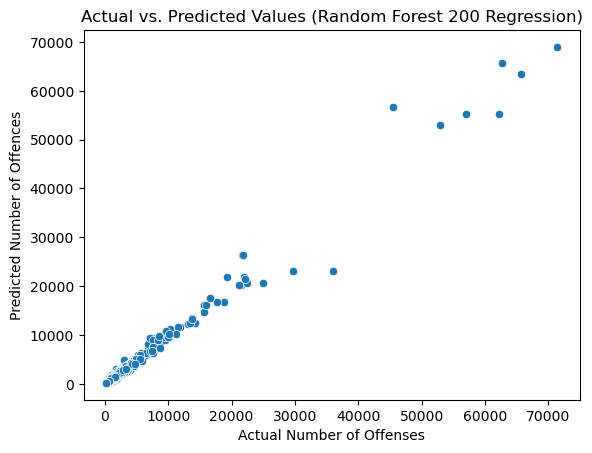

In [ ]:
# Visualizing the prediction

sns.scatterplot(x=y_test, y=y_predict)
plt.title('Actual vs. Predicted Values (Random Forest 200 Regression)')
plt.xlabel('Actual Number of Offenses')
plt.ylabel('Predicted Number of Offences')
plt.show()

# Comparing the Different Models

In [ ]:
RMSE_LINEAR = 1389.6306155518723
RMSE_DT = 165.9454053313888
RMSE_SVR_LINEAR = 1408.4774633511595
RMSE_RF_100 =  164.15590853999177

In [ ]:
models = ['Linear', 'DT', 'SVR Linear', 'RF100']

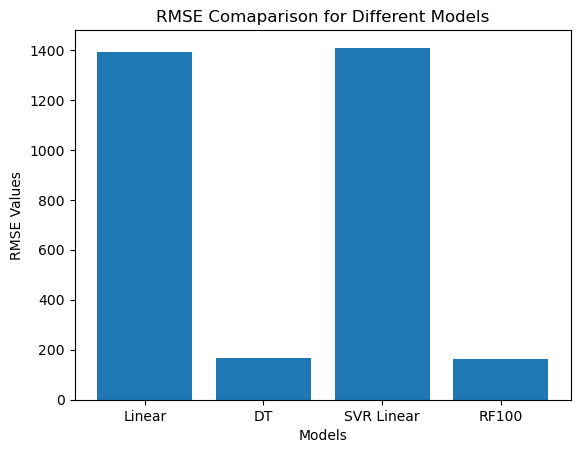

In [ ]:
# Values of the Root Mean Squared Errors
rmse_values = [RMSE_LINEAR, RMSE_DT, RMSE_SVR_LINEAR, RMSE_RF_100]

# Create bar chart
plt.bar(models, rmse_values)

# Adding the labels
plt.xlabel("Models")
plt.ylabel("RMSE Values")
plt.title("RMSE Comaparison for Different Models")

plt.show()

# Map Reduce

In [ ]:
spark = SparkSession.builder.appName("Map Reduce").getOrCreate()
df_2013_14 = spark.read.csv("C:/Users/Emeka/Downloads/2013-14.csv", header=True, inferSchema=True)
df_2014_15 = spark.read.csv("C:/Users/Emeka/Downloads/2014-15.csv", header=True, inferSchema=True)
df_2015_16 = spark.read.csv("C:/Users/Emeka/Downloads/2015-16.csv", header=True, inferSchema=True)
df_2016_17 = spark.read.csv("C:/Users/Emeka/Downloads/2016-17.csv", header=True, inferSchema=True)
df_2017_18 = spark.read.csv("C:/Users/Emeka/Downloads/2017-18.csv", header=True, inferSchema=True)
df_final = df_2013_14.union(df_2014_15).union(df_2015_16).union(df_2016_17).union(df_2017_18)

In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.functions import col, sum, count, avg, desc, max
from pyspark.sql.window import Window
from pyspark.sql import functions as F

# Q1: Count of Offences by Offence Group

In [ ]:
# Select relevant columns
df_filtered = df_final.select("Offence Group", "Number of Offences")

# Create key-value pairs (Offence Group, 1) for counting
df_mapped = df_filtered.rdd.map(lambda row: (row["Offence Group"], 1))

# Reduce by key (Offence Group) and count occurrences
df_reduced = df_mapped.reduceByKey(lambda x, y: x + y)

# Convert back to DataFrame and display
df_result = df_reduced.toDF(["Offence Group", "Count of Offences"])

df_result.toPandas()

,Offence Group,Count of Offences
0,Violence against the person,25344
1,Possession of weapons offences,5280
2,Criminal damage and arson,6160
3,Miscellaneous crimes against society,20944
4,Sexual offences,19360
5,Fraud offences,60
6,Robbery,1760
7,Theft offences,21648
8,Drug offences,3520
9,Public order offences,3520


# Q2: Count of Offences by Financial Year

In [ ]:
# Select relevant columns
df_mapped_year = df_final.select("Financial Year", "Number of Offences")

# Create key-value pairs (Financial Year, 1) for counting
df_mapped_year = df_mapped_year.rdd.map(lambda row: (row["Financial Year"], 1))

# Reduce by key (Financial Year) and count occurrences
df_reduced_year = df_mapped_year.reduceByKey(lambda x, y: x + y)

# Convert back to DataFrame and display
df_result_year = df_reduced_year.toDF(["Financial Year", "Count of Offences"])

df_result_year.toPandas()

,Financial Year,Count of Offences
0,2015/16,21308
1,2016/17,21308
2,2014/15,21132
3,2017/18,23068
4,2013/14,20780


# Q1: Least Common Offence Description

In [ ]:
least_common = df_final.groupBy("Offence Description").agg(count("*").alias("Least Common")) \
    .orderBy(F.asc(col("Least Common"))).limit(1)
least_common.toPandas()

,Offence Description,Least Common
0,Fraud offences recorded by UK Finance,3


# Q2: Force with the Highest Number of Offences

In [ ]:
force_low = df_final.groupBy("Force Name") \
    .agg(sum("Number of Offences").alias("Total Offences")) \
    .orderBy(F.desc(col("Total Offences"))) \
    .select("Force Name", "Total Offences") \
    .limit(1)

force_low.toPandas()

,Force Name,Total Offences
0,Metropolitan Police,3737442


# Q3: Offence Distribution by Financial Year and Offence Group

In [ ]:
offence_distribution_by_year_group = df_final.groupBy("Financial Year", "Offence Group") \
    .agg(count("*").alias("Total")) \
    .orderBy("Financial Year", "Offence Group")

offence_distribution_by_year_group.toPandas()


,Financial Year,Offence Group,Total
0,2013/14,Criminal damage and arson,1232
1,2013/14,Drug offences,704
2,2013/14,Fraud offences,12
3,2013/14,Miscellaneous crimes against society,4048
4,2013/14,Possession of weapons offences,1056
5,2013/14,Public order offences,704
6,2013/14,Robbery,352
7,2013/14,Sexual offences,3872
8,2013/14,Theft offences,4048
9,2013/14,Violence against the person,4752


# Q4: Force with the Highest Average of Total Offences

In [ ]:
avg_force_offences = df_final.groupBy("Force Name").avg("Number of Offences").orderBy(F.desc("avg(Number of Offences)")) \
    .limit(1)
avg_force_offences.toPandas()

,Force Name,avg(Number of Offences)
0,CIFAS,69249.25
